In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
data=pd.read_excel('segment.xlsx')

In [81]:
data.head()

,Offer #,Campaign,Variety,Minimum Quantity (kg),Discount (%),Origin
0,1,January,Malbec,72,56,France
1,2,January,Pinot Noir,72,17,France
2,3,February,Espumante,144,32,Oregon
3,4,February,Champagne,72,48,France
4,5,February,Cabernet Sauvignon,144,44,New Zealand


# Question 1

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
Offer #                  32 non-null int64
Campaign                 32 non-null object
Variety                  32 non-null object
Minimum Quantity (kg)    32 non-null int64
Discount (%)             32 non-null int64
Origin                   32 non-null object
dtypes: int64(3), object(3)
memory usage: 1.6+ KB


In [83]:
data.describe()

,Offer #,Minimum Quantity (kg),Discount (%)
count,32.000000,32.000000,32.000000
mean,16.500000,65.812500,57.843750
std,9.380832,50.785722,20.770807
min,1.000000,6.000000,17.000000
25%,8.750000,12.000000,44.750000
50%,16.500000,72.000000,55.000000
75%,24.250000,72.000000,82.250000
max,32.000000,144.000000,89.000000


# Question 2

#### Option 1 

In [84]:
data['Origin'].value_counts()

France          9
Chile           4
Germany         3
Oregon          3
Australia       3
Italy           3
California      3
New Zealand     2
South Africa    2
Name: Origin, dtype: int64

#### Option 2

In [85]:
len(data[data['Origin']=='France'])

9

# Question 3

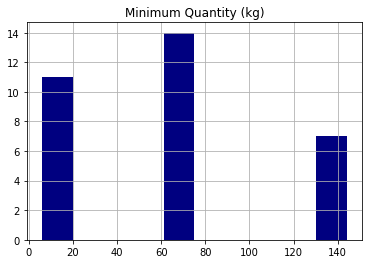

In [86]:
for i in data.select_dtypes(exclude=["object"]).columns.tolist():
    if data[i].nunique()<10:
        data[i].hist(color='navy')
        plt.title(i)
        plt.show()

# Question 4

In [90]:
def my_label(i):
    if i>80:
        return('high')
    elif i<60:
        return('lower')
    else:
        return('average')

In [91]:
data['Quantity_label']=data['Minimum Quantity (kg)'].apply(my_label)

In [93]:
data.head()

,Offer #,Campaign,Variety,Minimum Quantity (kg),Discount (%),Origin,Quantity_label
0,1,January,Malbec,72,56,France,average
1,2,January,Pinot Noir,72,17,France,average
2,3,February,Espumante,144,32,Oregon,high
3,4,February,Champagne,72,48,France,average
4,5,February,Cabernet Sauvignon,144,44,New Zealand,high


# Question 5

In [30]:
table=pd.pivot_table(data,index=['Variety'],columns=['Campaign'],values=['Offer #'],aggfunc='count',fill_value=0)
table

Offer #                                                   \
Campaign             April August December February January July June March   
Variety                                                                       
Cabernet Sauvignon       0      1        1        1       0    0    1     0   
Champagne                0      2        1        1       0    1    0     0   
Chardonnay               1      0        0        0       0    0    0     0   
Espumante                0      0        0        1       0    1    0     1   
Malbec                   0      0        1        0       1    0    0     0   
Merlot                   0      0        0        0       0    0    2     0   
Pinot Grigio             0      0        0        0       0    0    0     0   
Pinot Noir               0      0        0        0       1    1    0     0   
Prosecco                 1      0        0        0       0    0    0     2   

                                                   
Campaign           May November October September  
Variety                                            
Cabernet Sauvignon   0        1       1         0  
Champagne            1        0       1         0  
Chardonnay           0        0       0         1  
Espumante            0        0       0         0  
Malbec               0        0       0         0  
Merlot               1        0       0         0  
Pinot Grigio         0        1       0         0  
Pinot Noir           0        0       1         1  
Prosecco             1        0       0         0

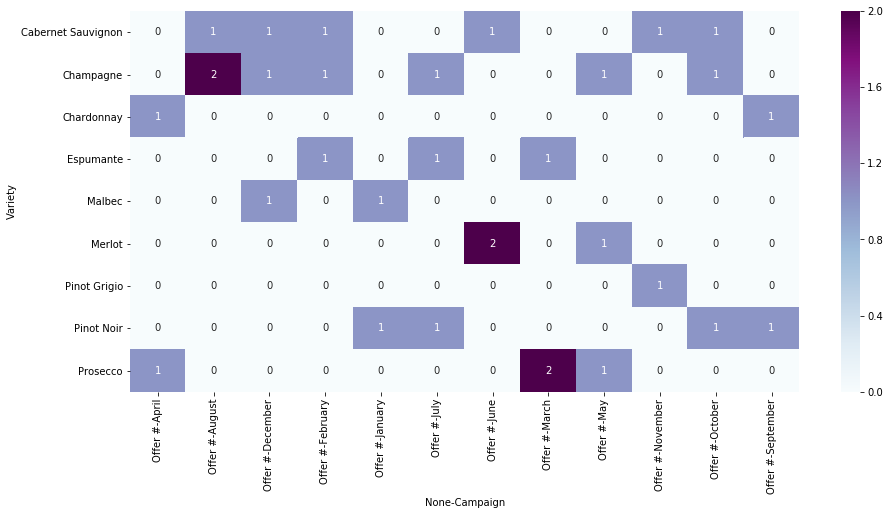

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(table,annot=True,cmap="BuPu")
plt.show()